In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Linnerud dataset
linnerud = load_linnerud()
linnerud_df = pd.DataFrame(data=linnerud['data'], columns=linnerud['feature_names'])


In [5]:
# Adding a target column to use for regression
linnerud_df['Target'] = linnerud['target'][:, 0]  # We select the first target variable for regression

In [6]:
# Feature selection and feature engineering
features = linnerud['feature_names']

In [7]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(linnerud_df, test_size=0.2, random_state=42)

In [8]:
# Train a RandomForestRegressor model
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

In [9]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [10]:
# Model tweaking, regularization, and hyperparameter tuning
def hyperparameter_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
    }
    rf_model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_

In [11]:
# Making Predictions with test data
def make_predictions(model, X_test, features):
    predictions = model.predict(X_test)
    results_df = pd.DataFrame({'Actual': test_data['Target'].values, 'Predicted': predictions})
    return results_df

In [12]:
# Preprocess the training data
X_train, y_train = train_data[features], train_data['Target']

In [13]:
# Train a RandomForestRegressor model
rf_model = train_random_forest(X_train, y_train)

In [14]:
# Evaluate the model
X_test, y_test = test_data[features], test_data['Target']
mse, r2 = evaluate_model(rf_model, X_test, y_test)
print(f'Mean Squared Error of the model on the test set: {mse:.2f}')
print(f'R2 Score of the model on the test set: {r2:.2f}')

Mean Squared Error of the model on the test set: 655.83
R2 Score of the model on the test set: -1.33


In [15]:
# Hyperparameter tuning
best_params = hyperparameter_tuning(X_train, y_train)
print('\nBest Hyperparameters:', best_params)


Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}


In [16]:
# Make predictions with test data
results_df = make_predictions(rf_model, X_test, features)
print('\nTest Data Predictions:')
print(results_df)


Test Data Predictions:
   Actual  Predicted
0   191.0     170.68
1   157.0     161.18
2   202.0     164.85
3   189.0     160.49


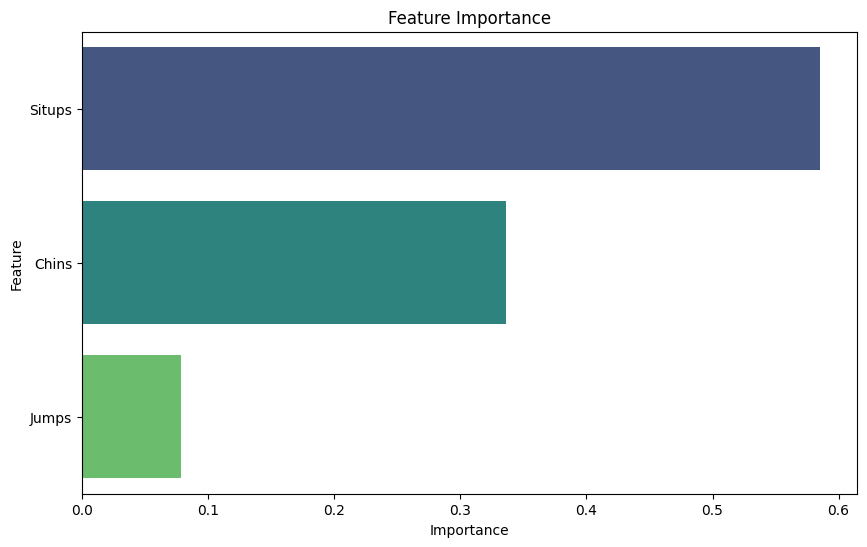

In [17]:
# Visualize feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance')
plt.show()